<a href="https://colab.research.google.com/github/AT200210/Data_Science/blob/main/NLP/Recommendation_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
parasharmanas_movie_recommendation_system_path = kagglehub.dataset_download('parasharmanas/movie-recommendation-system')

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/movie-recommendation-system/movies.csv
/kaggle/input/movie-recommendation-system/ratings.csv


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data1=pd.read_csv('/kaggle/input/movie-recommendation-system/movies.csv')

In [ ]:
data1

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
62418,209157,We (2018),Drama
62419,209159,Window of the Soul (2001),Documentary
62420,209163,Bad Poems (2018),Comedy|Drama
62421,209169,A Girl Thing (2001),(no genres listed)


In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  62423 non-null  int64 
 1   title    62423 non-null  object
 2   genres   62423 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


In [ ]:
import re
def clean_title(title):
    return re.sub("[^a-zA-Z0-9 ]", "", title)

In [ ]:
data1['genres']=data1['genres'].str.split('|')

data1['title']=data1['title'].apply(clean_title)

movies_data=data1[['movieId', 'title', 'genres']]

unique_genres = pd.Series([genre for genres_list in movies_data['genres'] for genre in genres_list]).unique()

movies_data.head()

,movieId,title,genres
0,1,Toy Story 1995,"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,Jumanji 1995,"[Adventure, Children, Fantasy]"
2,3,Grumpier Old Men 1995,"[Comedy, Romance]"
3,4,Waiting to Exhale 1995,"[Comedy, Drama, Romance]"
4,5,Father of the Bride Part II 1995,[Comedy]


In [ ]:
unique_genres

array(['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy',
       'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror',
       'Mystery', 'Sci-Fi', 'IMAX', 'Documentary', 'War', 'Musical',
       'Western', 'Film-Noir', '(no genres listed)'], dtype=object)

In [ ]:
len(unique_genres)

20

In [ ]:
no_genres_count=movies_data[movies_data['genres'].apply(lambda x: '(no genres listed)' in x)].shape[0]
no_genres_count

5062

In [ ]:
movies_data=movies_data[~movies_data['genres'].apply(lambda x: '(no genres listed)' in x)]

unique_genres = pd.Series([genre for genres_list in movies_data['genres'] for genre in genres_list]).unique()


In [ ]:
unique_genres

array(['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy',
       'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror',
       'Mystery', 'Sci-Fi', 'IMAX', 'Documentary', 'War', 'Musical',
       'Western', 'Film-Noir'], dtype=object)

In [ ]:
len(unique_genres)

19

Text(0, 0.5, 'Number of Films')

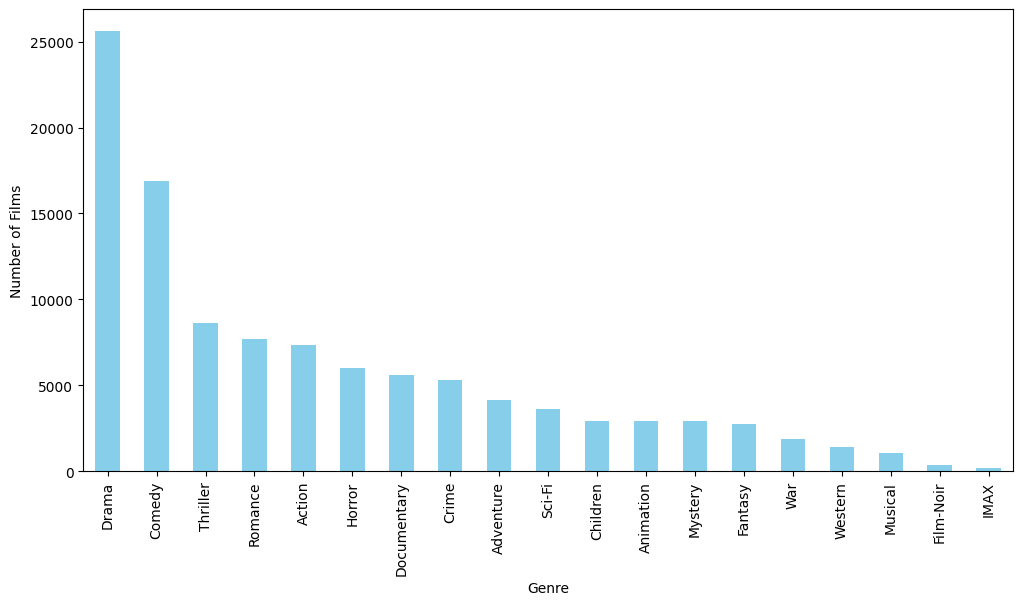

In [ ]:
import matplotlib.pyplot as plt

genre_counts=pd.Series([genre for genres_list in movies_data['genres'] for genre in genres_list]).value_counts()

plt.figure(figsize=(12,6))
genre_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Genre')
plt.ylabel('Number of Films')

In [ ]:
data2=pd.read_csv('/kaggle/input/movie-recommendation-system/ratings.csv')
data2

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510
...,...,...,...,...
25000090,162541,50872,4.5,1240953372
25000091,162541,55768,2.5,1240951998
25000092,162541,56176,2.0,1240950697
25000093,162541,58559,4.0,1240953434


In [ ]:
ratings_data=data2.drop(['timestamp'], axis=1)
ratings_data.head()

,userId,movieId,rating
0,1,296,5.0
1,1,306,3.5
2,1,307,5.0
3,1,665,5.0
4,1,899,3.5


In [ ]:
ratings_data.isnull().sum()

userId     0
movieId    0
rating     0
dtype: int64

In [ ]:
ratings_data.groupby('movieId')['rating'].mean()


movieId
1         3.893708
2         3.251527
3         3.142028
4         2.853547
5         3.058434
            ...   
209157    1.500000
209159    3.000000
209163    4.500000
209169    3.000000
209171    3.000000
Name: rating, Length: 59047, dtype: float64

In [ ]:
ratings_data.groupby('userId')['rating'].mean()

userId
1         3.814286
2         3.630435
3         3.697409
4         3.378099
5         3.752475
            ...   
162537    4.039604
162538    3.415584
162539    4.510638
162540    3.829545
162541    3.365385
Name: rating, Length: 162541, dtype: float64

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Count')

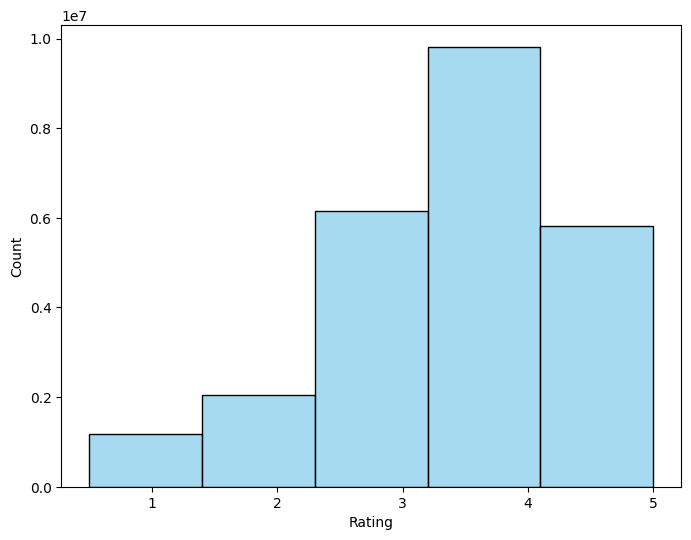

In [ ]:
import seaborn as sns
plt.figure(figsize=(8,6))

sns.histplot(ratings_data['rating'],bins=5, kde=False, color='skyblue')
plt.xlabel('Rating')
plt.ylabel('Count')

In [ ]:
combined_data=ratings_data.merge(movies_data, on='movieId')

In [ ]:
combined_data.head()

,userId,movieId,rating,title,genres
0,1,296,5.0,Pulp Fiction 1994,"[Comedy, Crime, Drama, Thriller]"
1,1,306,3.5,Three Colors Red Trois couleurs Rouge 1994,[Drama]
2,1,307,5.0,Three Colors Blue Trois couleurs Bleu 1993,[Drama]
3,1,665,5.0,Underground 1995,"[Comedy, Drama, War]"
4,1,899,3.5,Singin in the Rain 1952,"[Comedy, Musical, Romance]"


In [ ]:
avg_ratings_per_movie=combined_data.groupby('title')['rating'].mean().sort_values(ascending=False)
avg_ratings_per_movie.head(10)

title
Zum Teufel mit der Penne 1968                                          5.0
Love Simple 2009                                                       5.0
Love Chronicles 2003                                                   5.0
Hijacking Catastrophe 911 Fear  the Selling of American Empire 2004    5.0
Pastor Shepherd 2010                                                   5.0
Path of Blood 2018                                                     5.0
Horror Stories 2 2013                                                  5.0
Peacock 2015                                                           5.0
Hide 2011                                                              5.0
High Fantasy 2017                                                      5.0
Name: rating, dtype: float64

In [ ]:
movie_rating_counts=combined_data.groupby('title')['rating'].count().sort_values(ascending=False)
movie_rating_counts.head(10)

title
Forrest Gump 1994                        81491
Shawshank Redemption The 1994            81482
Pulp Fiction 1994                        79672
Silence of the Lambs The 1991            74127
Matrix The 1999                          72674
Star Wars Episode IV  A New Hope 1977    68717
Jurassic Park 1993                       64144
Schindlers List 1993                     60411
Braveheart 1995                          59184
Fight Club 1999                          58773
Name: rating, dtype: int64

In [ ]:
exploded_data=combined_data.explode('genres')
user_per_genre=exploded_data.groupby('genres')['userId'].nunique()


In [ ]:
user_per_genre

genres
Action         161975
Adventure      161821
Animation      140225
Children       148391
Comedy         162381
Crime          160855
Documentary     60393
Drama          162519
Fantasy        156809
Film-Noir       67849
Horror         141445
IMAX           119012
Musical        126133
Mystery        152209
Romance        161068
Sci-Fi         160063
Thriller       161948
War            146905
Western        110037
Name: userId, dtype: int64

In [ ]:
avg_rating_per_genre=exploded_data.groupby('genres')['rating'].mean().sort_values(ascending=False)
avg_rating_per_genre

genres
Film-Noir      3.925728
War            3.791466
Documentary    3.705281
Crime          3.685044
Drama          3.677185
Mystery        3.670169
Animation      3.614946
IMAX           3.603712
Western        3.585755
Musical        3.554716
Romance        3.542712
Thriller       3.522964
Adventure      3.517445
Fantasy        3.511589
Sci-Fi         3.478143
Action         3.466592
Children       3.432507
Comedy         3.423993
Horror         3.293563
Name: rating, dtype: float64

In [ ]:
top_movies_per_genre=(exploded_data.groupby(['genres','title'])['rating'].mean().reset_index().sort_values(['genres', 'rating'], ascending=[True,False]).groupby('genres').head(3))
top_movies_per_genre

,genres,title,rating
130,Action,A Police Inspector Calls 1974,5.000000
269,Action,Alien Rising 2013,5.000000
280,Action,All Hell Breaks Loose 2014,5.000000
6978,Adventure,A Throw of Dice 1929,5.000000
7092,Adventure,All Men Are Brothers 1975,5.000000
7218,Adventure,Azit the Paratrooper Dog 1972,5.000000
11336,Animation,Dashavatar Every era has a hero 2008,5.000000
11496,Animation,Elf Bowling the Movie 2007,5.000000
11645,Animation,Garfield Goes Hollywood 1987,5.000000
13732,Children,A Gift Horse 2015,5.000000


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

vectorizer_title=TfidfVectorizer(ngram_range=(1,2))

tfidf_title=vectorizer_title.fit_transform(movies_data['title'])

def search_by_title(title):
    title=clean_title(title)
    query_vec=vectorizer_title.transform([title])
    similarity=cosine_similarity(query_vec, tfidf_title).flatten()
    indices=np.argpartition(similarity, -5)[-5:]
    results=movies_data.iloc[indices][::-1]
    return results

movie_results=search_by_title('Fast and Furious')
movie_results

,movieId,title,genres
13226,67923,Fast Furious Fast and the Furious 4 The 2009,"[Action, Crime, Drama, Thriller]"
4264,4369,Fast and the Furious The 2001,"[Action, Crime, Thriller]"
19769,102716,Fast Furious 6 Fast and the Furious 6 The 2013,"[Action, Crime, Thriller, IMAX]"
6264,6383,2 Fast 2 Furious Fast and the Furious 2 The 2003,"[Action, Crime, Thriller]"
13528,69945,Fast and the Furious The 1955,"[Crime, Mystery]"


In [ ]:
vectorizer_genre=TfidfVectorizer(ngram_range=(1,2))

movies_data['genres_text']=movies_data['genres'].apply(lambda x: ' '.join(x))

tfidf_genre=vectorizer_genre.fit_transform(movies_data['genres_text'])

def search_by_genre(genres):
    query_vec=vectorizer_genre.transform([genres])
    similarity=cosine_similarity(query_vec, tfidf_genre).flatten()
    indices=np.argpartition(similarity, -10)[-10:]
    results=movies_data.iloc[indices][::-1]
    return results

gen='Adventure Action'
search_by_genre(gen)

,movieId,title,genres,genres_text
32201,140401,The Black Shield Of Falworth 1954,[Adventure],Adventure
42776,164604,Kicks 2016,[Adventure],Adventure
29028,133007,Temple of a Thousand Lights 1965,[Adventure],Adventure
29025,133001,The Spy Who Loved Flowers 1966,[Adventure],Adventure
43085,165249,Bagdad 1949,[Adventure],Adventure
43246,165599,Hayabusa 2011,[Adventure],Adventure
28905,132743,The Lost Volcano 1950,[Adventure],Adventure
29032,133015,Sandokan the Great 1963,[Adventure],Adventure
28648,132169,Time Traveller The Girl Who Leapt Through Time...,[Adventure],Adventure
27716,129990,Sergeant Klems 1971,[Adventure],Adventure


In [ ]:
def scores_calculator(movie_id):
    similar_users=combined_data.loc[(combined_data['movieId']==movie_id) & (combined_data['rating']>=4), 'userId'].unique()
    similar_user_recs=combined_data.loc[(combined_data['userId'].isin(similar_users)) & (combined_data['rating']>=4), 'movieId'].value_counts(normalize=True)
    all_user_recs=combined_data.loc[(combined_data['userId'].isin(similar_user_recs.index)) & (combined_data['rating']>=4)]
    all_user_recs=all_user_recs['movieId'].value_counts(normalize=True)
    selected_genres=combined_data.loc[combined_data['movieId']==movie_id, 'genres'].iloc[0]
    if isinstance(selected_genres, list):
        selected_genres= " ".join(selected_genres)

    movies_with_similar_genres=search_by_genre(selected_genres)
    similar_genre_ids=movies_with_similar_genres['movieId']

    similar_user_recs.loc[similar_user_recs.index.isin(similar_genre_ids)] *= 1.5
    all_user_recs.loc[all_user_recs.index.isin(similar_genre_ids)] *= 0.9

    scores=pd.DataFrame({ 'similar': similar_user_recs,
                        'all': all_user_recs}).fillna(0)

    scores['score']=np.where(scores['all']>0, scores['similar']/scores['all'], 0)

    return scores.sort_values('score', ascending=False)

scores_calculator(3114)

,similar,all,score
movieId,,,
6806,7.546276e-06,6.176858e-07,12.217013
69324,7.546276e-06,6.176858e-07,12.217013
25916,6.890078e-06,6.176858e-07,11.154664
47150,6.561979e-06,6.176858e-07,10.623490
8864,5.905781e-06,6.176858e-07,9.561141
...,...,...,...
73339,3.280990e-07,0.000000e+00,0.000000
141426,0.000000e+00,6.176858e-07,0.000000
141428,1.312396e-06,0.000000e+00,0.000000


In [ ]:
def recommendation_results(user_input, title=0):
    title_candidates = search_by_title(user_input)
    movie_id = title_candidates.iloc[title]['movieId']
    scores = scores_calculator(movie_id)
    results = scores.head(10).merge(movies_data, left_index=True, right_on='movieId')[['title', 'score', 'genres']]
    resutls = results.rename(columns={'title': 'title', 'genres': 'genres'}, inplace=True)
    return results

In [ ]:
user_input=input('Give a movie name:')
print('Here are some similar movies:')
for i in range(5):
    print(i, search_by_title(user_input)['title'].iloc[i])



Give a movie name: Matrix


Here are some similar movies:
0 Matrix The 1999
1 The Living Matrix 2009
2 Matrix of Evil 2003
3 Matrix Reloaded The 2003
4 Matrix Revolutions The 2003


In [ ]:
title=0
print("Recommendations are as follows:")
recommendation_results(user_input)

Recommendations are as follows:


,title,score,genres
13416,Flame and Citron Flammen Citronen 2008,8.267093,"[Action, Drama, War]"
8149,Mr 3000 2004,7.589462,"[Comedy, Drama]"
10195,Baxter The 2005,7.318410,"[Comedy, Drama, Romance]"
13934,Grave Decisions Wer frher stirbt ist lnger tot...,7.318410,"[Comedy, Drama]"
10658,Deep Sea 3D 2006,6.776305,"[Documentary, IMAX]"
6869,Hard Way The 1991,6.776305,"[Action, Comedy]"
23599,Black Sea 2015,6.776305,"[Adventure, Mystery, Thriller]"
11656,Four Minutes Vier Minuten 2006,6.505253,[Drama]
4035,No Mans Land 1987,6.505253,"[Crime, Drama]"
6088,Insignificance 1985,6.234201,"[Comedy, Drama]"
